In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
pd.options.display.max_columns = None # to see all the columns
pd.set_option('display.float_format', '{:.3g}'.format)

# Importer des données

In [ ]:
df = pd.read_csv("data_ML_avec_outliers.csv").drop('Unnamed: 0', axis = 'columns')
df.head(2)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5e+06,success,1,Information Technology,1.11e+03,0,9,North America
1,1000 Markets,5e+05,success,1,Media & Publishing,134,0,12,North America


In [ ]:
df["funding_range_1_2"].min()

0.0

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 8705
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8703 non-null   object 
 1   funding_total_usd  8703 non-null   float64
 2   status             8703 non-null   object 
 3   funding_rounds     8703 non-null   int64  
 4   Industry_Group     8703 non-null   object 
 5   funding_day        8703 non-null   float64
 6   funding_range_1_2  8703 non-null   float64
 7   company_age        8703 non-null   int64  
 8   Continent_Name     8703 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 679.9+ KB


# Data preprocessing

In [ ]:
from matplotlib.cbook import boxplot_stats

In [ ]:
for status, data in df.groupby('status'):
    data = data.loc[:, ["funding_total_usd"]]  # drop off the species column
    print(f'Outliers for: {status}')
    stats = boxplot_stats(data)
    print(stats)

Outliers for: failure
[{'mean': 14183414.330113515, 'iqr': 20715168.75, 'cilo': 1440093.3975074221, 'cihi': 2559906.602492578, 'whishi': 52000000.0, 'whislo': 100.0, 'fliers': array([5.1000000e+08, 6.0000000e+07, 1.0500000e+08, 1.2050000e+08,
       1.2500000e+08, 1.1000000e+08, 1.0900000e+08, 6.0100000e+07,
       5.6300000e+07, 7.0930000e+07, 8.0000000e+07, 1.2000000e+08,
       1.9666413e+08, 5.9500000e+07, 5.9463636e+07, 8.9500000e+07,
       5.5000000e+07, 1.2000000e+08, 1.4220000e+08, 1.4153571e+08,
       6.7400000e+07, 6.3500000e+07, 6.0900000e+07, 9.9670000e+07,
       5.9000000e+07, 6.7000000e+07, 7.6700000e+07, 1.3030000e+08,
       5.8000000e+07, 6.6000000e+07, 5.5346470e+07, 1.5630454e+08,
       5.8000000e+07, 6.0000000e+07, 9.6800000e+07, 7.3000000e+07,
       1.2340000e+08, 5.0000000e+08, 6.5000000e+07, 9.0000000e+07,
       1.0830000e+08, 6.0000000e+07, 6.0000000e+07, 7.5000000e+07,
       1.0680000e+08, 6.4800004e+07, 9.8900000e+07, 9.0200000e+07,
       5.2500000e+07

* label: tick label for the boxplot
* mean: arithmetic mean value
* med: 50th percentile
* q1: first quartile (25th percentile)
* q3: third quartile (75th percentile)
* cilo: lower notch around the median
* cihi: upper notch around the median
* whislo: end of the lower whisker
* whishi: end of the upper whisker
* fliers: outliers
* iqr: the difference between the upper quartile and the lower quartile.

In [ ]:
stas1 = pd.DataFrame.from_dict(boxplot_stats(df["funding_total_usd"].values))
stas1 = stas1.drop(["fliers", "iqr"], axis=1)
stas1

,mean,cilo,cihi,whishi,whislo,q1,med,q3
0,4.03e+07,9.37e+06,1.06e+07,9.41e+07,100,1.4e+06,1e+07,3.87e+07


In [ ]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
bins = [-1, 100, 1.4e+06, 9.37e+06, 1e+07, 1.06e+07, 3.87e+07, 4.03e+07, 9.41e+07, np.inf]
labels=["level_0", "level_1", "level_2", "level_3", "level_4", "level_5", "level_6", "level_7", "level_8"]
cat_invest = pd.cut(df["funding_total_usd"], bins = bins, labels=labels)
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
df.insert(0,'cat_total_funding',cat_invest) # creating new column called cat_total_investment

In [ ]:
stas2 = pd.DataFrame.from_dict(boxplot_stats(df["funding_day"].values))
stas2 = stas2.drop(["fliers", "iqr"], axis=1)
stas2

,mean,cilo,cihi,whishi,whislo,q1,med,q3
0,1.53e+03,581,637,4.29e+03,0,153,609,1.81e+03


In [ ]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
bins = [-1, 0, 153, 581, 609, 637, 1.53e+03, 1.81e+03, 4.29e+03, np.inf]
labels=["level_0", "level_1", "level_2", "level_3", "level_4", "level_5", "level_6", "level_7", "level_8"]
cat_invest = pd.cut(df["funding_day"], bins = bins, labels=labels)
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
df.insert(1,'cat_funding_day',cat_invest) # creating new column called cat_total_investment

In [ ]:
df["funding_range_1_2"].max()

33628.0

In [ ]:
stas3 = pd.DataFrame.from_dict(boxplot_stats(df["funding_range_1_2"].values))
stas3 = stas3.drop(["fliers", "iqr"], axis=1)
stas3

,mean,cilo,cihi,whishi,whislo,q1,med,q3
0,568,-14.4,14.4,2.13e+03,0,0,0,854


In [ ]:
bins = [-1, 0, 14, 568, 854, 2.13e+03, np.inf]
labels=["level_0", "level_1", "level_2", "level_3", "level_4", "level_5"]
cat_invest = pd.cut(df["funding_range_1_2"], bins = bins, labels=labels)
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
df.insert(2,'cat_funding_range_1_2',cat_invest) # creating new column called cat_total_investment

In [ ]:
stas4 = pd.DataFrame.from_dict(boxplot_stats(df["company_age"].values))
stas4 = stas4.drop(["fliers", "iqr"], axis=1)
stas4

,mean,cilo,cihi,whishi,whislo,q1,med,q3
0,16.4,14.8,15.2,33,6,11,15,20


In [ ]:
bins = [-1, 6, 11, 14.8, 15, 15.2, 16.4, 20, 33, np.inf]
labels=["level_0", "level_1", "level_2", "level_3", "level_4", "level_5", "level_6", "level_7", "level_8"]
cat_invest = pd.cut(df["company_age"], bins = bins, labels=labels)
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
df.insert(3,'cat_company_age',cat_invest) # creating new column called cat_total_investment

In [ ]:
df.head(5)

,cat_total_funding,cat_funding_day,cat_funding_range_1_2,cat_company_age,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,level_2,level_5,level_0,level_1,1 Mainstream,5e+06,success,1,Information Technology,1.11e+03,0,9,North America
1,level_1,level_1,level_0,level_2,1000 Markets,5e+05,success,1,Media & Publishing,134,0,12,North America
2,level_2,level_0,level_2,level_1,1000memories,2.54e+06,success,2,Information Technology,0,411,11,North America
3,level_1,level_1,level_2,level_1,100Plus,1.25e+06,success,2,Data Science,47,28,10,North America
4,level_5,level_7,level_0,level_7,1010data,3.5e+07,success,1,Information Technology,3.72e+03,0,21,North America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 8705
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   cat_total_funding      8703 non-null   category
 1   cat_funding_day        8703 non-null   category
 2   cat_funding_range_1_2  8703 non-null   category
 3   cat_company_age        8703 non-null   category
 4   name                   8703 non-null   object  
 5   funding_total_usd      8703 non-null   float64 
 6   status                 8703 non-null   object  
 7   funding_rounds         8703 non-null   int64   
 8   Industry_Group         8703 non-null   object  
 9   funding_day            8703 non-null   float64 
 10  funding_range_1_2      8703 non-null   float64 
 11  company_age            8703 non-null   int64   
 12  Continent_Name         8703 non-null   object  
dtypes: category(4), float64(3), int64(2), object(4)
memory usage: 715.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import plot_precision_recall_curve, precision_score, recall_score

In [ ]:
labelencoder = LabelEncoder()
df['cat_total_funding'] = labelencoder.fit_transform(df['cat_total_funding'] )
df["cat_funding_day"] = labelencoder.fit_transform(df["cat_funding_day"])
df['cat_funding_range_1_2'] = labelencoder.fit_transform(df['cat_funding_range_1_2'])
df['cat_company_age'] = labelencoder.fit_transform(df['cat_company_age'])

In [ ]:
df.head()

,cat_total_funding,cat_funding_day,cat_funding_range_1_2,cat_company_age,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,2,5,0,1,1 Mainstream,5e+06,success,1,Information Technology,1.11e+03,0,9,North America
1,1,1,0,2,1000 Markets,5e+05,success,1,Media & Publishing,134,0,12,North America
2,2,0,2,1,1000memories,2.54e+06,success,2,Information Technology,0,411,11,North America
3,1,1,2,1,100Plus,1.25e+06,success,2,Data Science,47,28,10,North America
4,5,7,0,6,1010data,3.5e+07,success,1,Information Technology,3.72e+03,0,21,North America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 8705
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cat_total_funding      8703 non-null   int64  
 1   cat_funding_day        8703 non-null   int64  
 2   cat_funding_range_1_2  8703 non-null   int64  
 3   cat_company_age        8703 non-null   int64  
 4   name                   8703 non-null   object 
 5   funding_total_usd      8703 non-null   float64
 6   status                 8703 non-null   object 
 7   funding_rounds         8703 non-null   int64  
 8   Industry_Group         8703 non-null   object 
 9   funding_day            8703 non-null   float64
 10  funding_range_1_2      8703 non-null   float64
 11  company_age            8703 non-null   int64  
 12  Continent_Name         8703 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 951.9+ KB


In [ ]:
df.to_csv("data_DL.csv")

# Deep learning

In [2]:
import tensorflow as tf 
import os
import io
import warnings

In [3]:
url = "https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/data_DL.csv"
df = pd.read_csv(url).drop('Unnamed: 0', axis = 'columns')
df = df.dropna()
df.head(5)

,cat_total_funding,cat_funding_day,cat_funding_range_1_2,cat_company_age,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,level_2,level_5,level_0,level_1,1 Mainstream,5e+06,success,1,Information Technology,1.11e+03,0,9,North America
1,level_1,level_1,level_0,level_2,1000 Markets,5e+05,success,1,Media & Publishing,134,0,12,North America
2,level_2,level_0,level_2,level_1,1000memories,2.54e+06,success,2,Information Technology,0,411,11,North America
3,level_1,level_1,level_2,level_1,100Plus,1.25e+06,success,2,Data Science,47,28,10,North America
4,level_5,level_7,level_0,level_7,1010data,3.5e+07,success,1,Information Technology,3.72e+03,0,21,North America


In [4]:
df1 = df[["cat_total_funding", "cat_funding_day", "cat_funding_range_1_2", "cat_company_age", "funding_rounds", "status"]]
df1.head()

,cat_total_funding,cat_funding_day,cat_funding_range_1_2,cat_company_age,funding_rounds,status
0,level_2,level_5,level_0,level_1,1,success
1,level_1,level_1,level_0,level_2,1,success
2,level_2,level_0,level_2,level_1,2,success
3,level_1,level_1,level_2,level_1,2,success
4,level_5,level_7,level_0,level_7,1,success


In [5]:
df2 = df1.copy()

In [6]:
df2["text"]= df2[df2.columns[0:5]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df2.head()

,cat_total_funding,cat_funding_day,cat_funding_range_1_2,cat_company_age,funding_rounds,status,text
0,level_2,level_5,level_0,level_1,1,success,level_2 level_5 level_0 level_1 1
1,level_1,level_1,level_0,level_2,1,success,level_1 level_1 level_0 level_2 1
2,level_2,level_0,level_2,level_1,2,success,level_2 level_0 level_2 level_1 2
3,level_1,level_1,level_2,level_1,2,success,level_1 level_1 level_2 level_1 2
4,level_5,level_7,level_0,level_7,1,success,level_5 level_7 level_0 level_7 1


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 8702
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cat_total_funding      8703 non-null   object
 1   cat_funding_day        8703 non-null   object
 2   cat_funding_range_1_2  8703 non-null   object
 3   cat_company_age        8703 non-null   object
 4   funding_rounds         8703 non-null   int64 
 5   status                 8703 non-null   object
 6   text                   8703 non-null   object
dtypes: int64(1), object(6)
memory usage: 543.9+ KB


## Encoder decoder

In [8]:
usefull_cols = ['text', 'status']
df3 = df2[usefull_cols]
df3.head(5)

,text,status
0,level_2 level_5 level_0 level_1 1,success
1,level_1 level_1 level_0 level_2 1,success
2,level_2 level_0 level_2 level_1 2,success
3,level_1 level_1 level_2 level_1 2,success
4,level_5 level_7 level_0 level_7 1,success


In [9]:
df3["padded_status"] = df3.iloc[:,1].apply(lambda x: "<start> "+x)
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,status,padded_status
0,level_2 level_5 level_0 level_1 1,success,<start> success
1,level_1 level_1 level_0 level_2 1,success,<start> success
2,level_2 level_0 level_2 level_1 2,success,<start> success
3,level_1 level_1 level_2 level_1 2,success,<start> success
4,level_5 level_7 level_0 level_7 1,success,<start> success


In [10]:
tokenizer_text = tf.keras.preprocessing.text.Tokenizer()
tokenizer_status = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

In [11]:
tokenizer_text.fit_on_texts(df3["text"])
tokenizer_status.fit_on_texts(df3["padded_status"])

In [12]:
df3["text_indices"] = tokenizer_text.texts_to_sequences(df3["text"])
df3["status_indices"] = tokenizer_status.texts_to_sequences(df3["status"])
df3["padded_status_indices"] = tokenizer_status.texts_to_sequences(df3["padded_status"])
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,text,status,padded_status,text_indices,status_indices,padded_status_indices
0,level_2 level_5 level_0 level_1 1,success,<start> success,"[1, 3, 1, 5, 1, 4, 1, 2, 2]",[2],"[1, 2]"
1,level_1 level_1 level_0 level_2 1,success,<start> success,"[1, 2, 1, 2, 1, 4, 1, 3, 2]",[2],"[1, 2]"
2,level_2 level_0 level_2 level_1 2,success,<start> success,"[1, 3, 1, 4, 1, 3, 1, 2, 3]",[2],"[1, 2]"
3,level_1 level_1 level_2 level_1 2,success,<start> success,"[1, 2, 1, 2, 1, 3, 1, 2, 3]",[2],"[1, 2]"
4,level_5 level_7 level_0 level_7 1,success,<start> success,"[1, 5, 1, 6, 1, 4, 1, 6, 2]",[2],"[1, 2]"


In [13]:
df3["padded_status_indices_clean"] = df3["padded_status_indices"].apply(lambda x: x[:-1])
df3.head()

,text,status,padded_status,text_indices,status_indices,padded_status_indices,padded_status_indices_clean
0,level_2 level_5 level_0 level_1 1,success,<start> success,"[1, 3, 1, 5, 1, 4, 1, 2, 2]",[2],"[1, 2]",[1]
1,level_1 level_1 level_0 level_2 1,success,<start> success,"[1, 2, 1, 2, 1, 4, 1, 3, 2]",[2],"[1, 2]",[1]
2,level_2 level_0 level_2 level_1 2,success,<start> success,"[1, 3, 1, 4, 1, 3, 1, 2, 3]",[2],"[1, 2]",[1]
3,level_1 level_1 level_2 level_1 2,success,<start> success,"[1, 2, 1, 2, 1, 3, 1, 2, 3]",[2],"[1, 2]",[1]
4,level_5 level_7 level_0 level_7 1,success,<start> success,"[1, 5, 1, 6, 1, 4, 1, 6, 2]",[2],"[1, 2]",[1]


In [14]:
# Use of Keras to create token sequences of the same length
padded_text_indices = tf.keras.preprocessing.sequence.pad_sequences(df3["text_indices"], padding="post")
padded_status_indices = tf.keras.preprocessing.sequence.pad_sequences(df3["status_indices"], padding="post")
teacher_forcing_status = tf.keras.preprocessing.sequence.pad_sequences(df3["padded_status_indices_clean"], padding="post")

In [15]:
# Visualization of the shape of one of the tensors
padded_text_indices.shape

(8703, 9)

In [16]:
padded_status_indices.shape

(8703, 1)

In [17]:
teacher_forcing_status.shape

(8703, 1)

In [18]:
from sklearn.model_selection import train_test_split
status_train, status_val, text_train, text_val, teacher_train, teacher_val =  train_test_split(padded_status_indices,
                                                                                   padded_text_indices,
                                                                                   teacher_forcing_status,
                                                                                   test_size=0.2)

In [19]:
text_train.shape

(6962, 9)

In [20]:
status_train.shape

(6962, 1)

In [21]:
teacher_train.shape

(6962, 1)

In [22]:
n_lstm = 64
n_embed = 128
text_len = padded_text_indices.shape[1]
status_len = padded_status_indices.shape[1]
vocab_size_text = len(tokenizer_text.word_index)
vocab_size_status = len(tokenizer_status.word_index)

In [23]:
encoder_input = tf.keras.Input(shape=(text_len))
encoder_embed = tf.keras.layers.Embedding(input_dim=vocab_size_text+1, output_dim=n_embed)
encoder_lstm = tf.keras.layers.LSTM(n_lstm, return_state=True)

encoder_embed_ouput = encoder_embed(encoder_input)
encoder_output = encoder_lstm(encoder_embed_ouput)

encoder = tf.keras.Model(inputs = encoder_input, outputs = encoder_output)

In [24]:
encoder(text_train)

[<tf.Tensor: shape=(6962, 64), dtype=float32, numpy=
 array([[ 0.00219438, -0.02475895, -0.01429455, ...,  0.00619075,
         -0.01833222,  0.02109143],
        [-0.00515429, -0.01865568, -0.00199752, ..., -0.00517449,
          0.01089452, -0.00748489],
        [ 0.00333891, -0.00928048,  0.00166207, ..., -0.0008431 ,
          0.00394366, -0.00968887],
        ...,
        [ 0.01196766, -0.01219465, -0.00495466, ..., -0.00589903,
         -0.00497404, -0.02153265],
        [ 0.01058098, -0.00168786, -0.01775714, ...,  0.00029097,
         -0.00074109, -0.01584237],
        [ 0.00519899, -0.01630107, -0.01230485, ...,  0.0016296 ,
         -0.01227708, -0.00203043]], dtype=float32)>,
 <tf.Tensor: shape=(6962, 64), dtype=float32, numpy=
 array([[ 0.00219438, -0.02475895, -0.01429455, ...,  0.00619075,
         -0.01833222,  0.02109143],
        [-0.00515429, -0.01865568, -0.00199752, ..., -0.00517449,
          0.01089452, -0.00748489],
        [ 0.00333891, -0.00928048,  0.00166207,

In [25]:
decoder_input = tf.keras.Input(shape=(status_len))
decoder_embed = tf.keras.layers.Embedding(input_dim=vocab_size_status+1, 
                                          output_dim=n_embed)
decoder_lstm = tf.keras.layers.LSTM(n_lstm, return_sequences=True, return_state=True)
decoder_pred = tf.keras.layers.Dense(vocab_size_status+1, activation="sigmoid") #sigmoid, softmax

decoder_embed_output = decoder_embed(decoder_input) # teacher forcing happens here
# the decoder input is actually the padded target we created earlier, remember
# if target is: [91, 47, 89, 21, 62]
# the decoder input will be: [0, 91, 47, 89, 21]
decoder_lstm_output, _, _ = decoder_lstm(decoder_embed_output, initial_state=encoder_output[1:])
# in the step described above the decoder receives the encoder state as its
# initial state.
decoder_output = decoder_pred(decoder_lstm_output)
# then the dense layer will convert the vector representation for each element
# in the sequence into a probability distribution across all possible tokens
# in the vocabulary!

decoder = tf.keras.Model(inputs = [encoder_input,decoder_input], outputs = decoder_output)
# all we need to do is put the model together using the input output framework!

In [26]:
decoder([text_train,teacher_train])

<tf.Tensor: shape=(6962, 1, 4), dtype=float32, numpy=
array([[[0.50558794, 0.4900856 , 0.50217485, 0.49848643]],

       [[0.5002137 , 0.49098817, 0.5001197 , 0.49741435]],

       [[0.50385934, 0.4890418 , 0.50476813, 0.49923697]],

       ...,

       [[0.5053953 , 0.49175397, 0.5059237 , 0.50341594]],

       [[0.5041597 , 0.49235064, 0.50647455, 0.5025553 ]],

       [[0.50662786, 0.49198967, 0.5045193 , 0.5007363 ]]], dtype=float32)>

In [27]:
decoder_state_input_h = tf.keras.Input(shape=(n_lstm,))
decoder_state_input_c = tf.keras.Input(shape=(n_lstm,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
# at the first step of the inference, these input will be respectively the
# hidden state and C state of the encoder model
# for following steps, they will become the hidden and C state from the decoder
# itself since the input sequence is unknown we will have to predict step by step
# using a loop

decoder_input_inf = tf.keras.Input(shape=(1))
decoder_embed_output = decoder_embed(decoder_input_inf)
# the decoder input here is of shape 1 because we will feed the elements in the 
# sequence one by one

decoder_outputs, state_h, state_c = decoder_lstm(decoder_embed_output, initial_state=decoder_states_inputs)
# the lstm layer works in the same way, the output from the embedding is used
# and the decoder state is used as described above

decoder_states = [state_h, state_c]
# we store the lstm states in a specific object as we'll have to use them as 
# initial state for the next inference step

decoder_outputs = decoder_pred(decoder_outputs)
# the lstm output is then converted to a probability distribution over the
# target vocabulary

decoder_inf = tf.keras.Model(inputs = [decoder_input_inf, decoder_states_inputs], 
                     outputs = [decoder_outputs, decoder_states])
# Finally we wrap up the model building by setting up the inputs and outputs

In [28]:
decoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [29]:
history_deco = decoder.fit(x=[text_train, teacher_train], y=status_train,epochs=50, 
                validation_data=([text_val, teacher_val], status_val))

Epoch 1/50
218/218 [==============================] - 12s 35ms/step - loss: 0.6641 - sparse_categorical_accuracy: 0.6909 - val_loss: 0.5500 - val_sparse_categorical_accuracy: 0.7197
Epoch 2/50
218/218 [==============================] - 6s 27ms/step - loss: 0.5495 - sparse_categorical_accuracy: 0.7369 - val_loss: 0.5500 - val_sparse_categorical_accuracy: 0.7237
Epoch 3/50
218/218 [==============================] - 5s 24ms/step - loss: 0.5443 - sparse_categorical_accuracy: 0.7415 - val_loss: 0.5479 - val_sparse_categorical_accuracy: 0.7277
Epoch 4/50
218/218 [==============================] - 3s 12ms/step - loss: 0.5443 - sparse_categorical_accuracy: 0.7384 - val_loss: 0.5477 - val_sparse_categorical_accuracy: 0.7335
Epoch 5/50
218/218 [==============================] - 3s 13ms/step - loss: 0.5399 - sparse_categorical_accuracy: 0.7423 - val_loss: 0.5546 - val_sparse_categorical_accuracy: 0.7157
Epoch 6/50
218/218 [==============================] - 3s 13ms/step - loss: 0.5387 - sparse_cat

In [30]:
history_deco.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

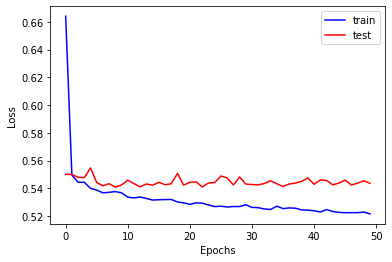

In [31]:
plt.plot(history_deco.history["loss"], color="b", label='train')
plt.plot(history_deco.history["val_loss"], color="r", label='test')
plt.ylabel("Loss")
plt.xlabel("Epochs")
#plt.ylim(1.38, 1.4)
plt.legend()
plt.show()

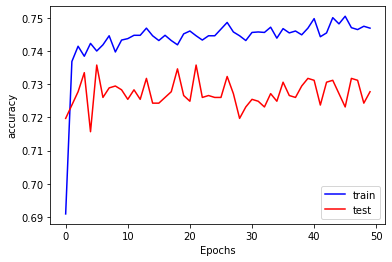

In [32]:
plt.plot(history_deco.history['sparse_categorical_accuracy'], label='train', color="b")
plt.plot(history_deco.history['val_sparse_categorical_accuracy'], label='test', color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Enregistrez les meilleurs paramètres

In [ ]:
decoder.save("sigmoid_0.0005_Sparse.h5")
json.dump(decoder.history.history, open("sigmoid_0.0005_Sparse.json", 'w'))

In [ ]:
sigmoid_0_0005_Sparse = json.load(open("sigmoid_0.0005_Sparse.json", 'r'))

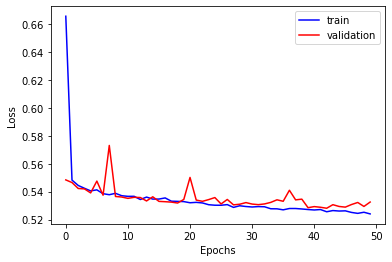

In [ ]:
plt.plot(sigmoid_0_0005_Sparse["loss"], color="b", label='train')
plt.plot(sigmoid_0_0005_Sparse["val_loss"], color="r", label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
#plt.ylim(1.38, 1.4)
plt.legend()
plt.show()

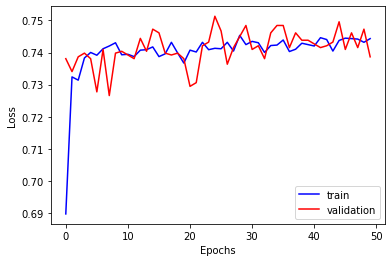

In [ ]:
plt.plot(sigmoid_0_0005_Sparse['sparse_categorical_accuracy'], color="b", label='train')
plt.plot(sigmoid_0_0005_Sparse['val_sparse_categorical_accuracy'], color="r", label='validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()